In [51]:
# Mevcut dosyaları listeleyelim
import os

train_path = r'C:\SesData\Train'
print("Train klasöründeki dosyalar:")
for person in os.listdir(train_path):
    person_path = os.path.join(train_path, person)
    print(f"\n{person} klasörü:")
    for file in os.listdir(person_path):
        print(file)


Train klasöründeki dosyalar:

aliberk klasörü:
aliberk1.m4a
aliberk2.m4a

irem klasörü:
irem1.m4a
irem1.wav
irem2.m4a


In [56]:
from pydub import AudioSegment
import os
import noisereduce as nr
import librosa
import soundfile as sf  # Gürültü azaltılmış sesin kaydedilmesi için

train_path = r'C:\SesData\Train'
test_path = r'C:\SesData\Test'

def convert_m4a_to_wav(root_path):
    successful_conversions = []
    failed_conversions = []
    
    for person in os.listdir(root_path):
        person_path = os.path.join(root_path, person)
        print(f"İşleniyor: {person}")
        
        for voice_file in os.listdir(person_path):
            if voice_file.endswith(".m4a"):
                try:
                    voice_path = os.path.join(person_path, voice_file)
                    new_voice = os.path.join(person_path, f"{os.path.splitext(voice_file)[0]}.wav")
                    
                    print(f"Dosya yolu: {voice_path}")
                    print(f"Yeni dosya yolu: {new_voice}")
                    
                    try:
                        # .m4a dosyasını .wav formatına dönüştür
                        audio = AudioSegment.from_file(voice_path, format="m4a", codec="aac")
                        audio.export(new_voice, format="wav")
                        
                        # Gürültü azaltımı için librosa ile ses dosyasını yükle
                        y, sr = librosa.load(new_voice, sr=16000)
                        
                        # Gürültü azaltma işlemi
                        y = nr.reduce_noise(y=y, sr=sr)
                        
                        # Gürültü azaltılmış sesi kaydet
                        output_path = os.path.join(person_path, f"denoised_{os.path.splitext(voice_file)[0]}.wav")
                        sf.write(output_path, y, sr)
                        
                        successful_conversions.append(f"{person}/{voice_file}")
                        print(f"Başarılı: {voice_file}")
                    
                    except Exception as e:
                        print(f"Dosya işleme hatası: {str(e)}")
                        raise
                        
                except Exception as e:
                    error_msg = f"{person}/{voice_file} - Hata: {str(e)}"
                    failed_conversions.append(error_msg)
                    print(f"Hata oluştu: {error_msg}")

    print("\nBaşarılı Dönüşümler:")
    for success in successful_conversions:
        print(f"✓ {success}")
    
    print("\nBaşarısız Dönüşümler:")
    for fail in failed_conversions:
        print(f"✗ {fail}")

# TRAIN ve TEST klasörlerini işlemeye başla
print("TRAIN KLASÖRÜ DÖNÜŞÜMÜ BAŞLIYOR...")
convert_m4a_to_wav(train_path)

print("\nTEST KLASÖRÜ DÖNÜŞÜMÜ BAŞLIYOR...")
convert_m4a_to_wav(test_path)


c:\Users\iremm\.conda\envs\BTK-AI\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


TRAIN KLASÖRÜ DÖNÜŞÜMÜ BAŞLIYOR...
İşleniyor: aliberk
Dosya yolu: C:\SesData\Train\aliberk\aliberk1.m4a
Yeni dosya yolu: C:\SesData\Train\aliberk\aliberk1.wav
Başarılı: aliberk1.m4a
Dosya yolu: C:\SesData\Train\aliberk\aliberk2.m4a
Yeni dosya yolu: C:\SesData\Train\aliberk\aliberk2.wav
Başarılı: aliberk2.m4a
İşleniyor: irem
Dosya yolu: C:\SesData\Train\irem\irem1.m4a
Yeni dosya yolu: C:\SesData\Train\irem\irem1.wav
Başarılı: irem1.m4a
Dosya yolu: C:\SesData\Train\irem\irem2.m4a
Yeni dosya yolu: C:\SesData\Train\irem\irem2.wav
Başarılı: irem2.m4a

Başarılı Dönüşümler:
✓ aliberk/aliberk1.m4a
✓ aliberk/aliberk2.m4a
✓ irem/irem1.m4a
✓ irem/irem2.m4a

Başarısız Dönüşümler:

TEST KLASÖRÜ DÖNÜŞÜMÜ BAŞLIYOR...
İşleniyor: aliberk
Dosya yolu: C:\SesData\Test\aliberk\aliberk3.m4a
Yeni dosya yolu: C:\SesData\Test\aliberk\aliberk3.wav
Başarılı: aliberk3.m4a
İşleniyor: irem
Dosya yolu: C:\SesData\Test\irem\irem3.m4a
Yeni dosya yolu: C:\SesData\Test\irem\irem3.wav
Başarılı: irem3.m4a

Başarılı Dönüşü

TRAIN KLASÖRÜ WAVEFORM VE SPECTROGRAM HİSTOGRAMI İŞLEMİ BAŞLIYOR...
İşleniyor: aliberk


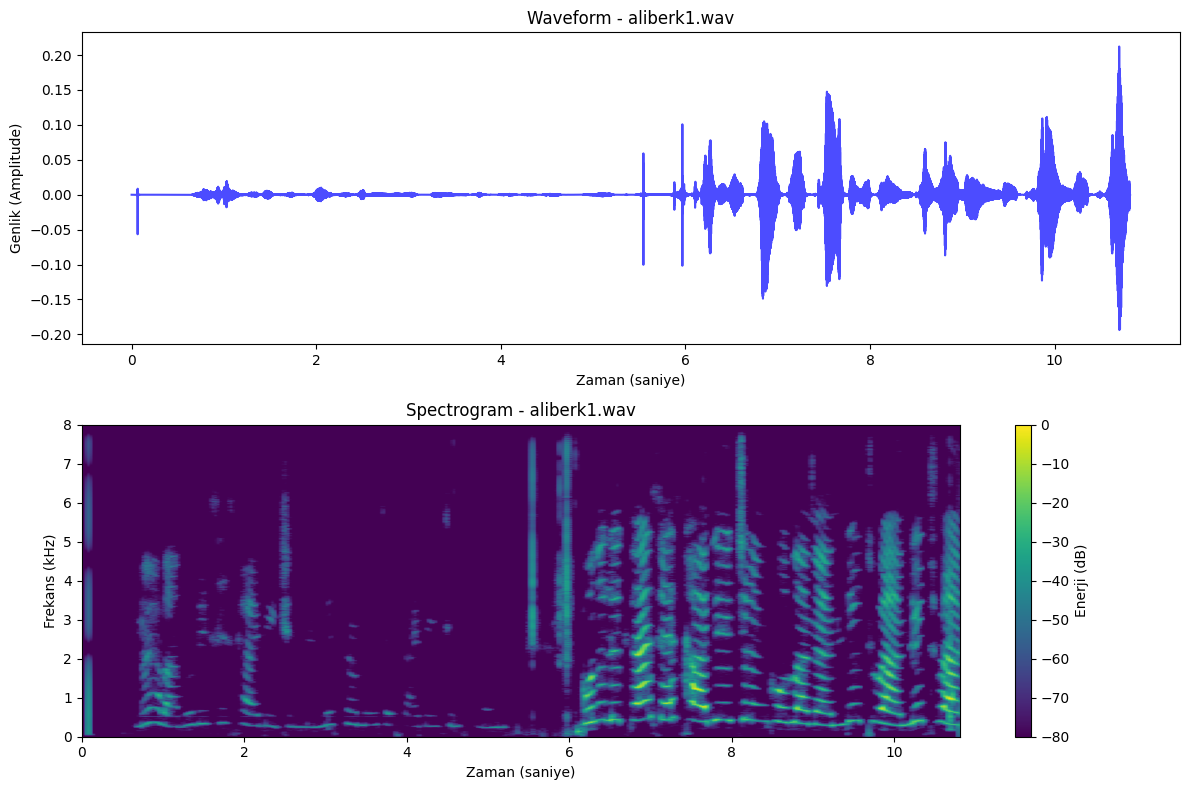

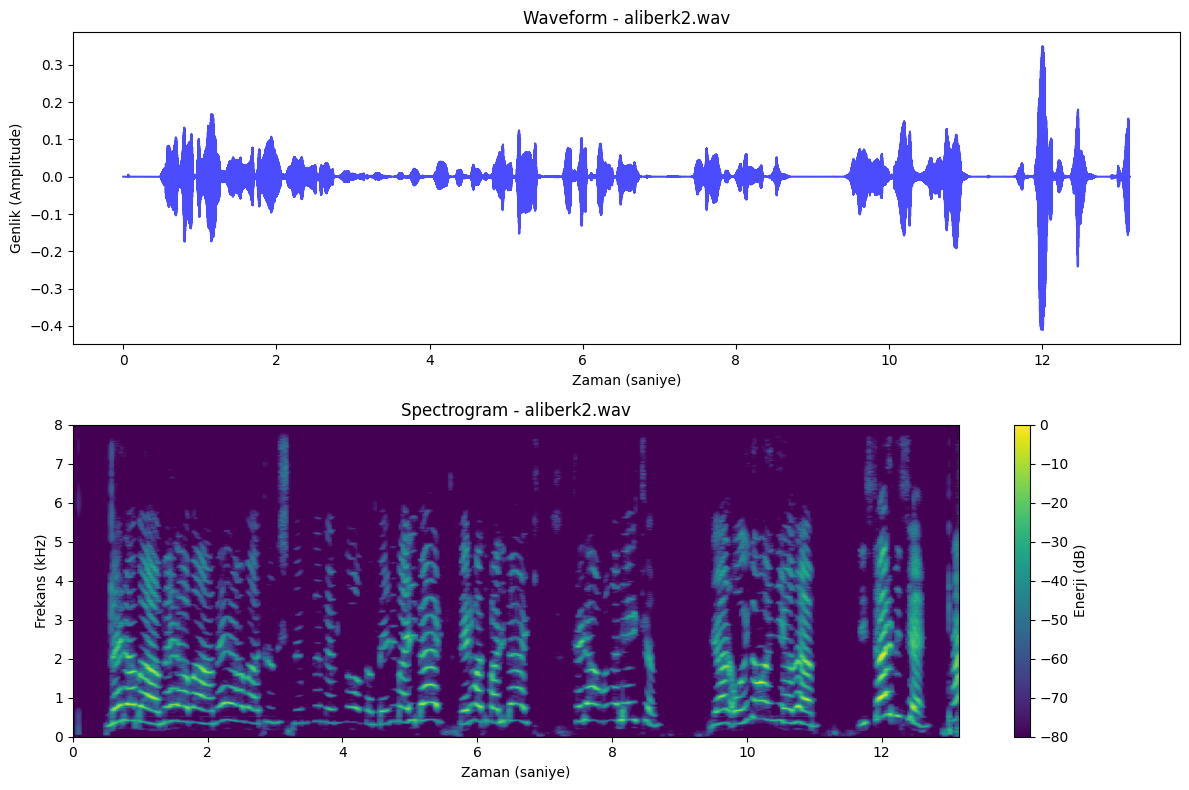

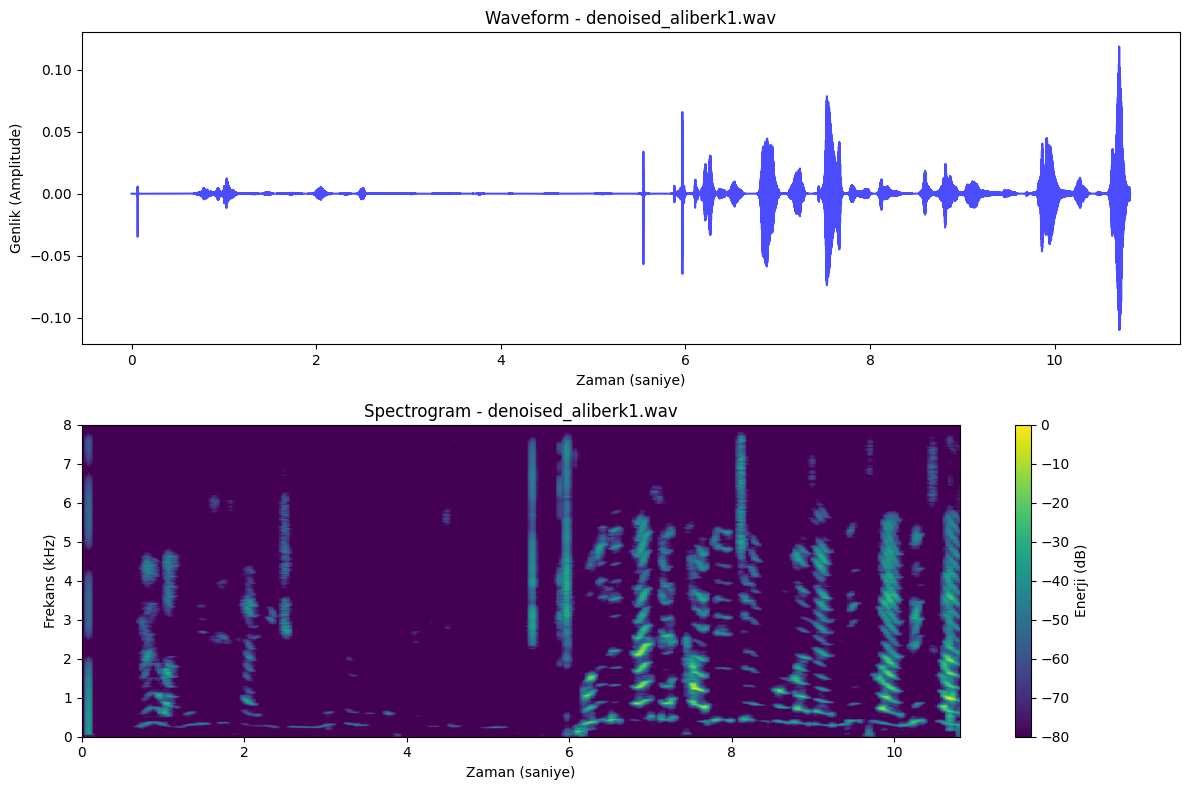

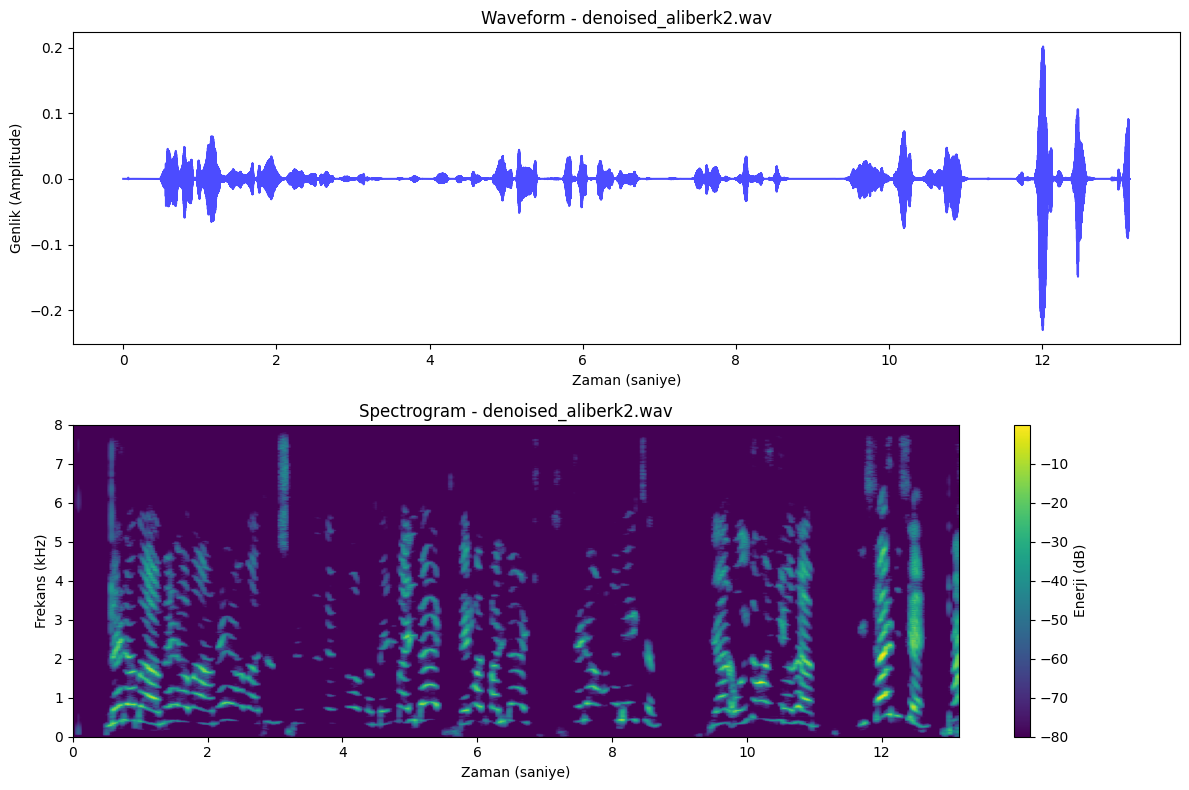

İşleniyor: irem


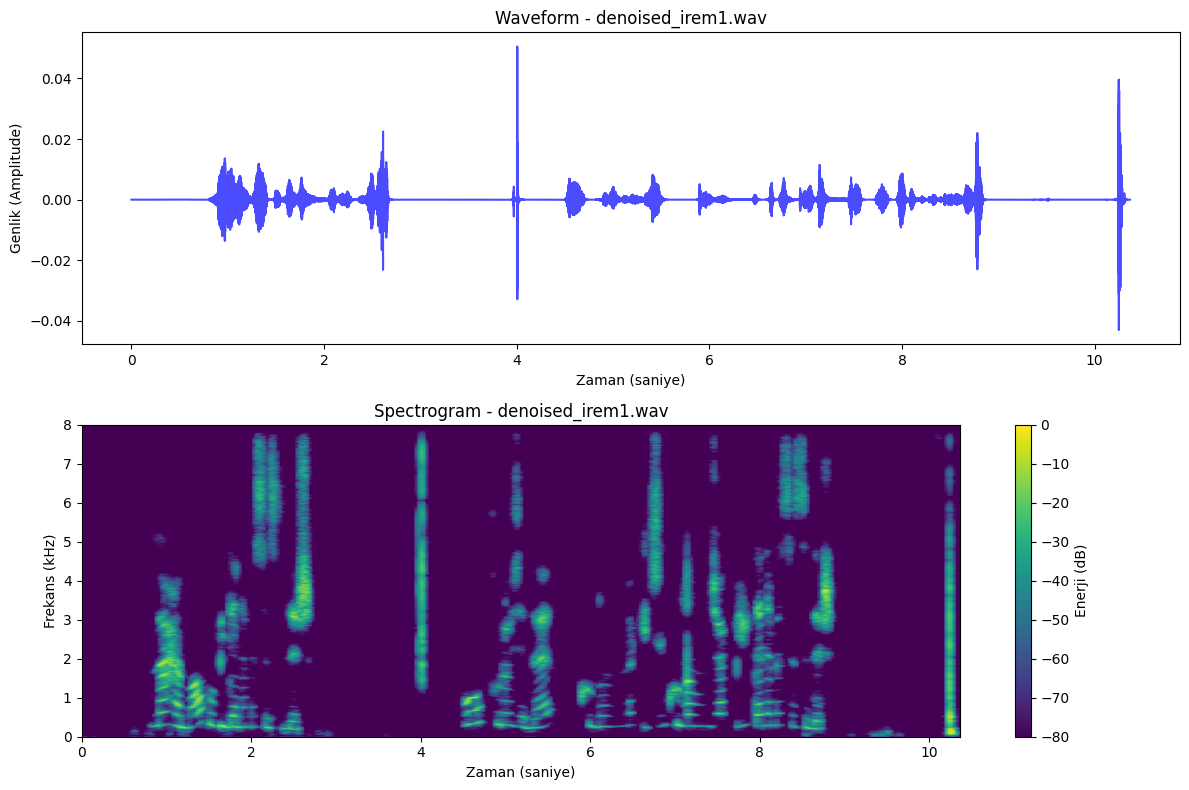

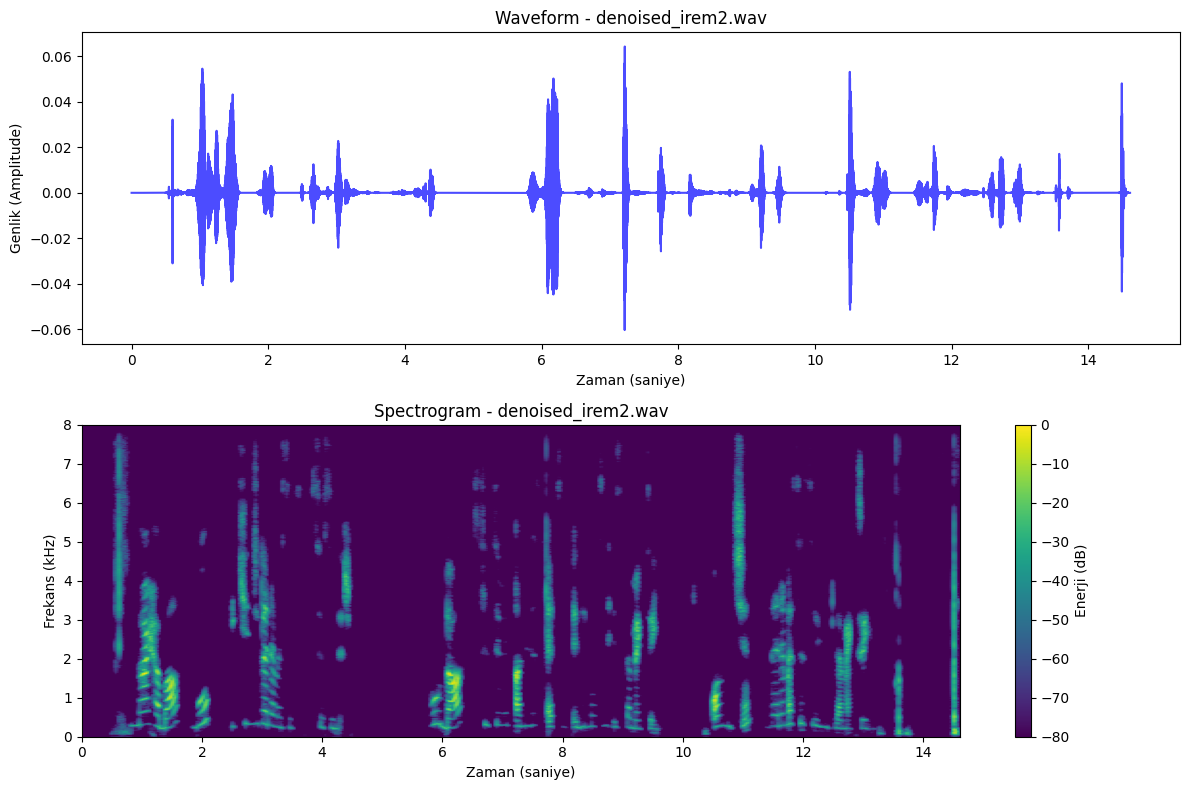

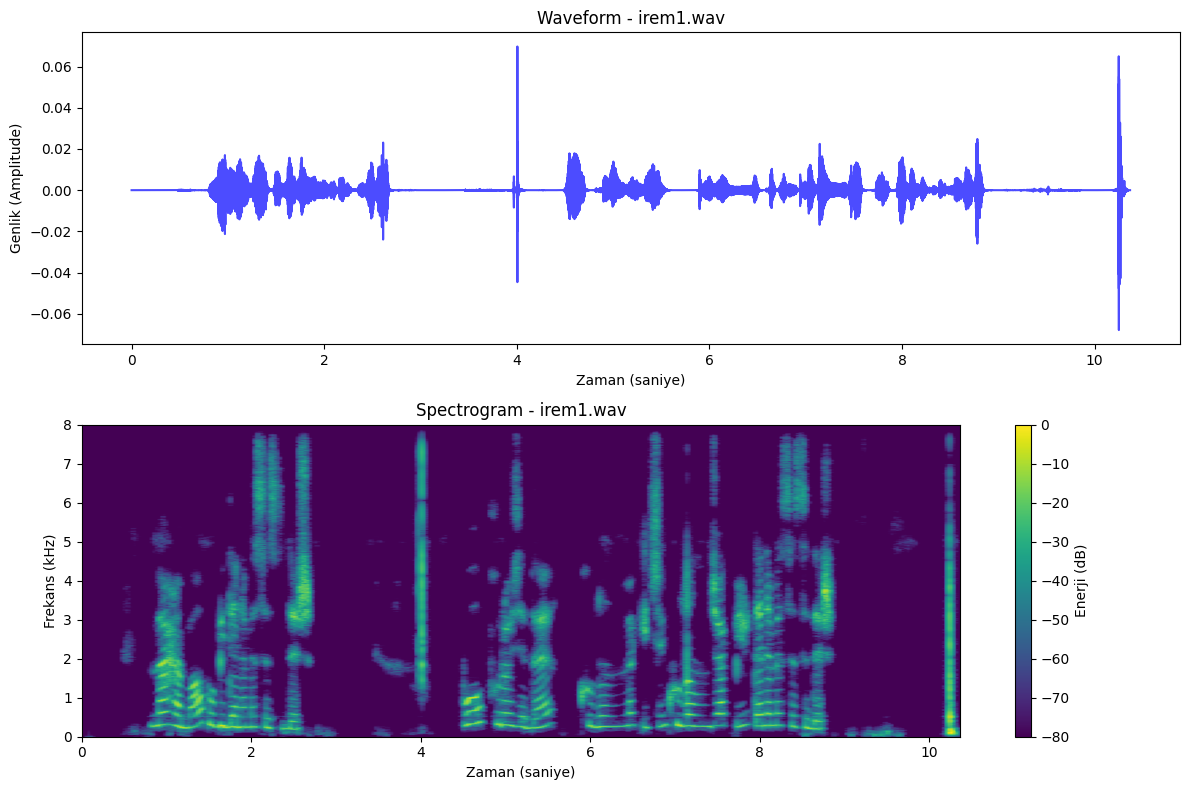

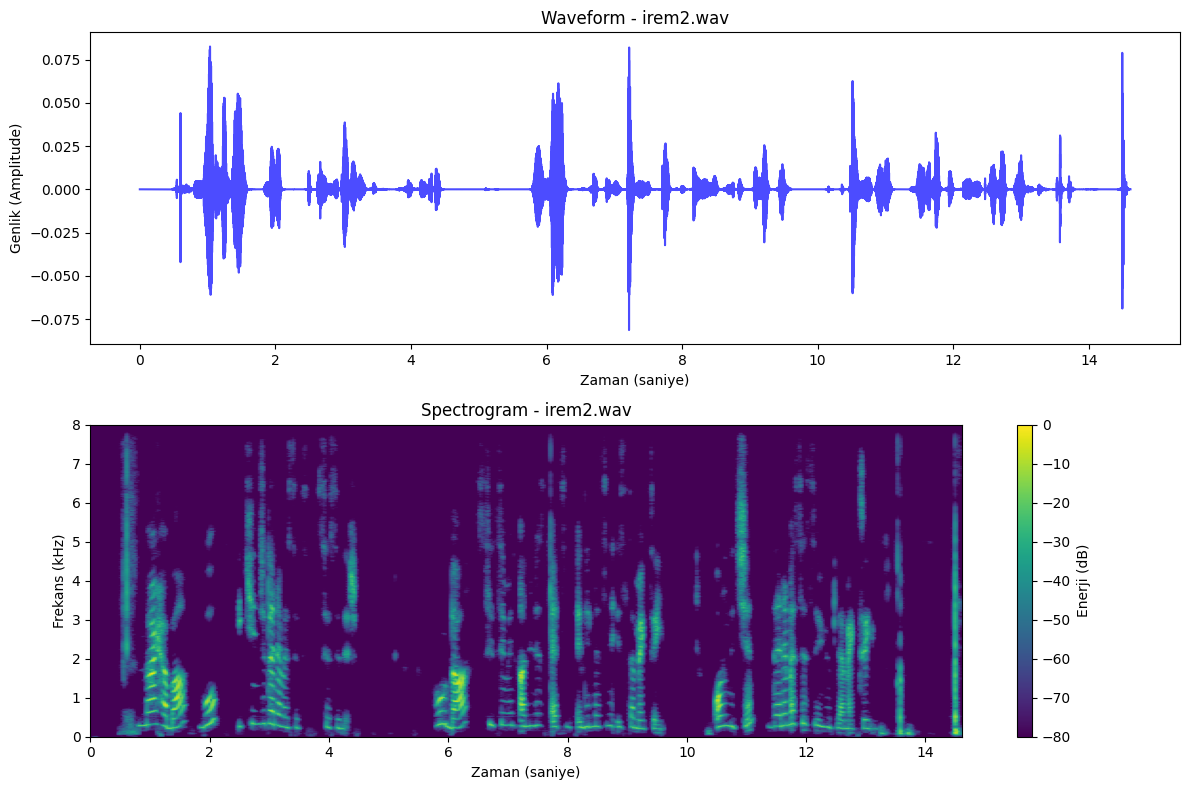


TEST KLASÖRÜ WAVEFORM VE SPECTROGRAM HİSTOGRAMI İŞLEMİ BAŞLIYOR...
İşleniyor: aliberk


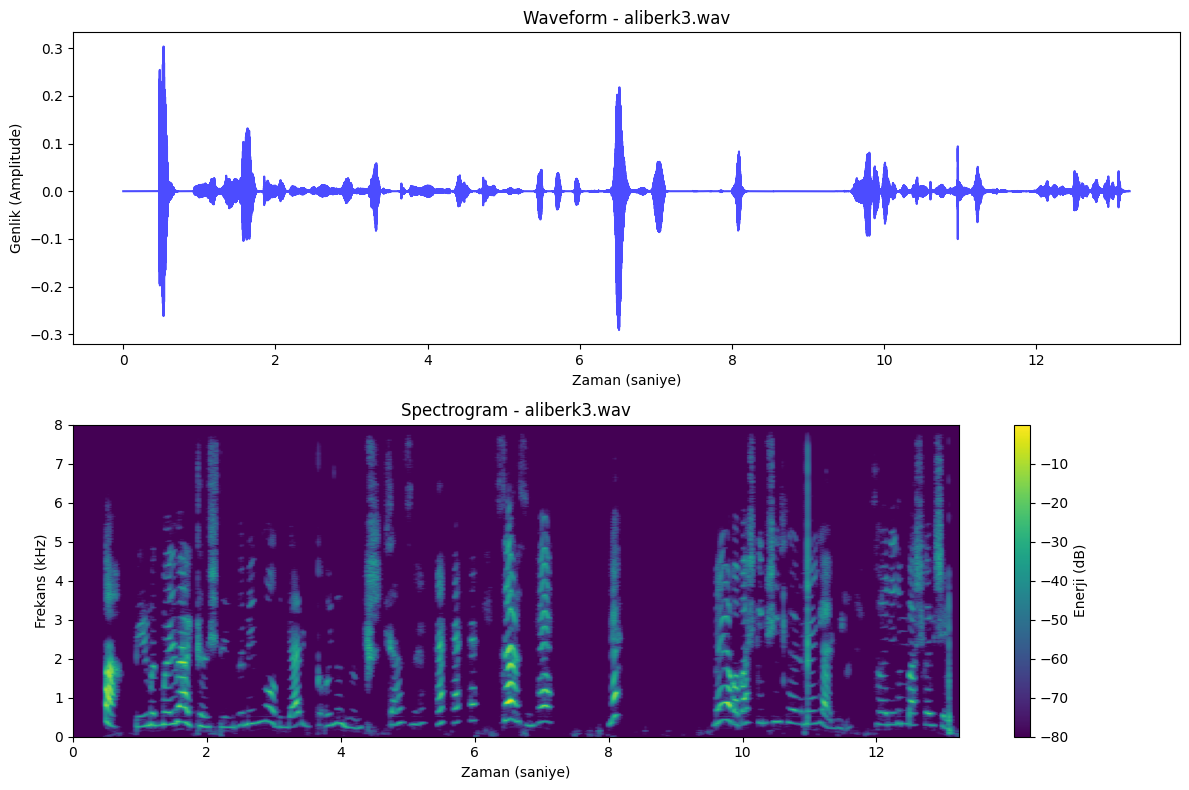

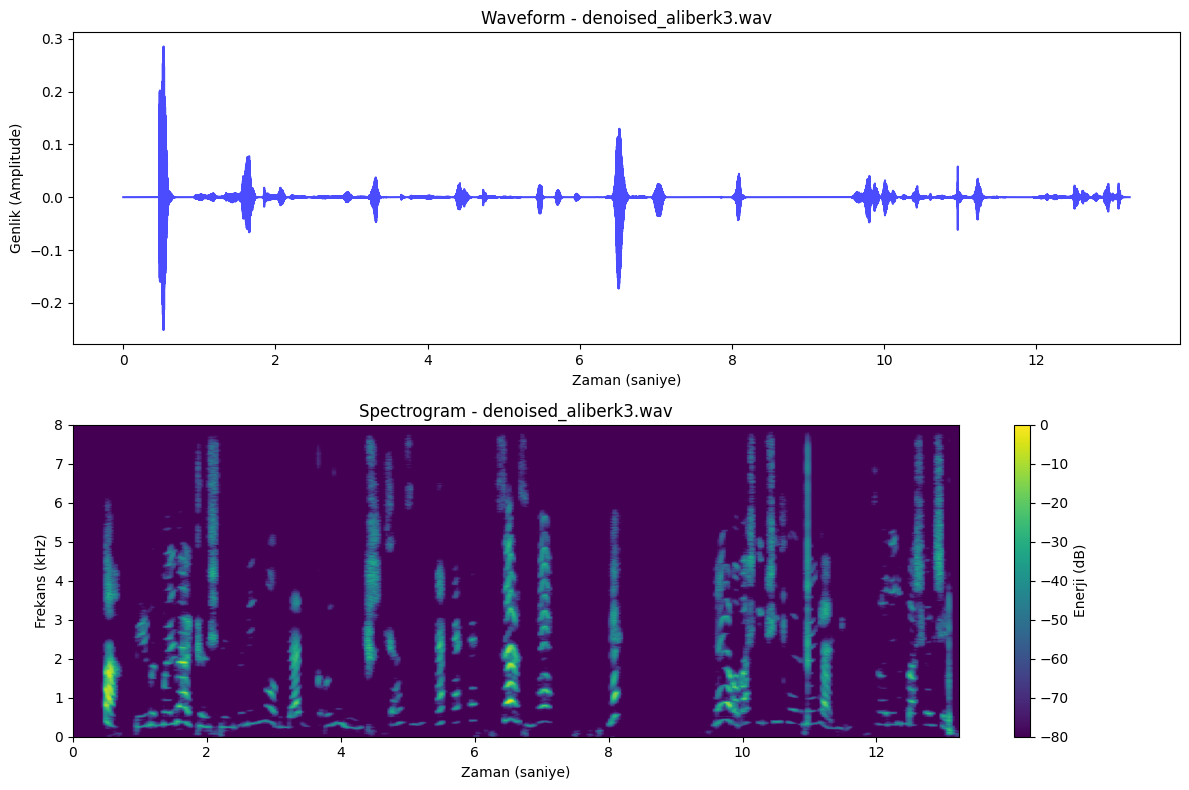

İşleniyor: irem


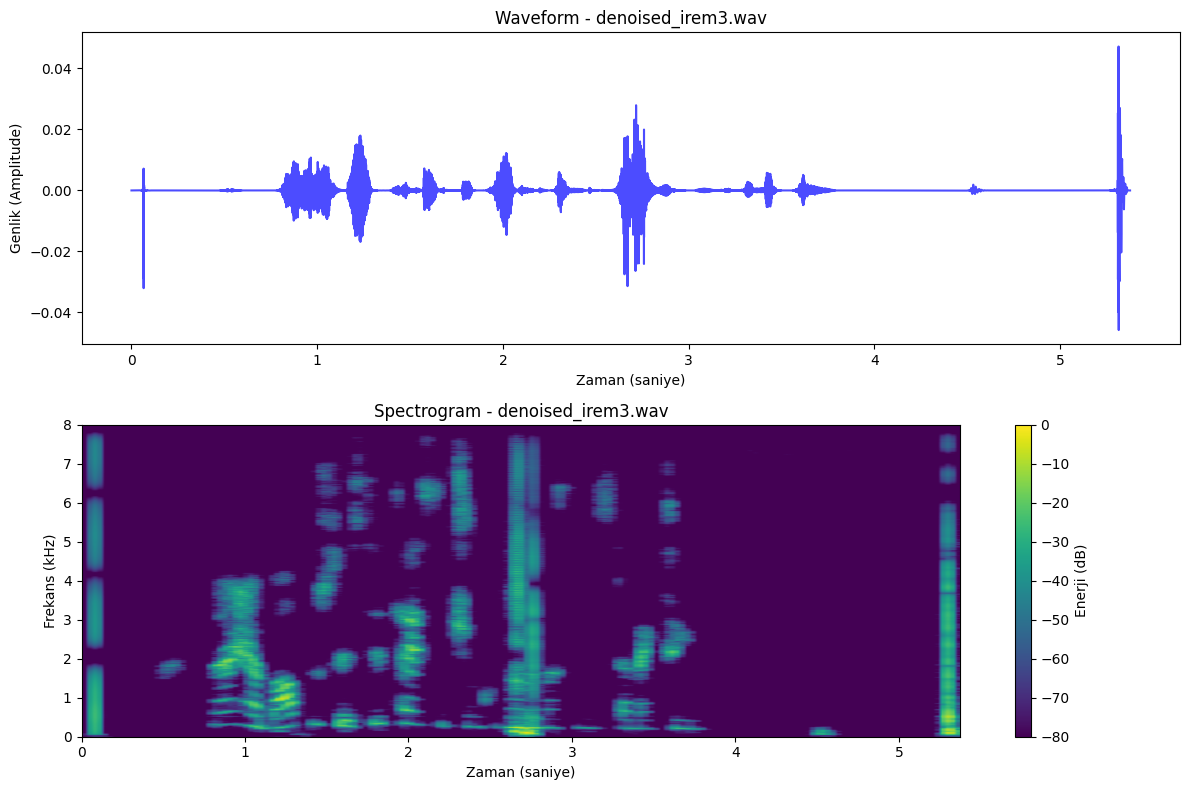

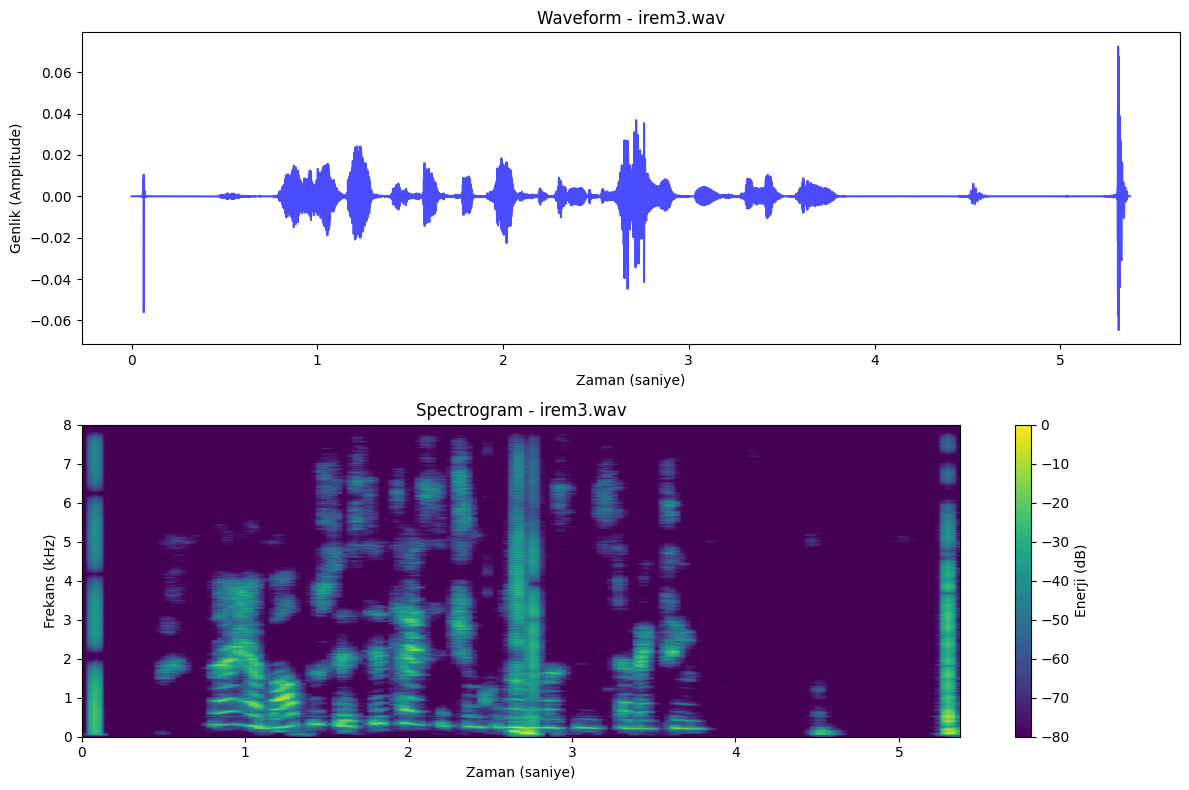

In [66]:
import librosa
import matplotlib.pyplot as plt
import os
import noisereduce as nr
import numpy as np

def plot_waveform_and_spectrogram_histogram(file_path):
    # Ses dosyasını yükle
    y, sr = librosa.load(file_path, sr=16000)
    
    # Gürültü azaltma (isteğe bağlı)
    y = nr.reduce_noise(y=y, sr=sr)
    
    # Waveform (dalga formu) histogramı
    plt.figure(figsize=(12, 8))

    # Waveform Histogramı: Amplitude ve Zaman
    plt.subplot(2, 1, 1)
    plt.plot(np.linspace(0, len(y) / sr, num=len(y)), y, color='blue', alpha=0.7)
    plt.title(f'Waveform - {os.path.basename(file_path)}')
    plt.xlabel('Zaman (saniye)')
    plt.ylabel('Genlik (Amplitude)')

    # Spectrogram (frekans spektrumu) histogramı
    D = librosa.stft(y)  # Short-Time Fourier Transform
    S_db, phase = librosa.magphase(D)  # Sadece genlik
    S_db = librosa.amplitude_to_db(S_db, ref=np.max)  # Logaritmik dönüşüm (dB)

    # Spectrogram Enerji Histogramı: kHz ve Zaman
    plt.subplot(2, 1, 2)
    plt.imshow(S_db, aspect='auto', cmap='viridis', origin='lower', 
               extent=[0, len(y) / sr, 0, sr / 2000])  # X: Zaman, Y: Frekans (kHz)
    plt.title(f'Spectrogram - {os.path.basename(file_path)}')
    plt.xlabel('Zaman (saniye)')
    plt.ylabel('Frekans (kHz)')
    plt.colorbar(label='Enerji (dB)')

    plt.tight_layout()
    plt.show()

def process_and_plot_waveform_spectrogram_histograms(root_path):
    for person in os.listdir(root_path):
        person_path = os.path.join(root_path, person)
        print(f"İşleniyor: {person}")
        
        for voice_file in os.listdir(person_path):
            if voice_file.endswith(".wav"):
                voice_path = os.path.join(person_path, voice_file)
                plot_waveform_and_spectrogram_histogram(voice_path)

# TRAIN ve TEST klasörlerini işlemeye başla
print("TRAIN KLASÖRÜ WAVEFORM VE SPECTROGRAM HİSTOGRAMI İŞLEMİ BAŞLIYOR...")
process_and_plot_waveform_spectrogram_histograms(train_path)

print("\nTEST KLASÖRÜ WAVEFORM VE SPECTROGRAM HİSTOGRAMI İŞLEMİ BAŞLIYOR...")
process_and_plot_waveform_spectrogram_histograms(test_path)
